In [1]:
!pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.3/7.9 MB 4.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.9 MB 7.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.9 MB 8.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.9 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.9 MB 9.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.9 MB 9.6 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.9 MB 9.8 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/7.9 MB 10.3 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.9 MB 10.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/7.9 MB 10.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/7.9 MB 10.6 MB/s eta 0:00:01
   ------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [3]:
print(df.shape)
df["판매유형별"].value_counts()

(2772, 5)


판매유형별
면세점 이외    2772
Name: count, dtype: int64

In [4]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [5]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


#### Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

In [6]:
# 연도 컬럼 생성
df["연도"] = df["시점"].map(lambda x: int(x.split(".")[0]))

In [7]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018


In [8]:
# 분기 컬럼 생성
df["분기"] = df["시점"].map(lambda x: int(x.split(".")[1].split("/")[0]))

In [9]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [10]:
df["백만원"] = df["데이터"].astype(float)

In [11]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1,1054.0
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2,946.0
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3,791.0
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4,854.0
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1,2033.0


In [12]:
df["연도"].dtype

dtype('int64')

In [13]:
df["분기"].dtype

dtype('int64')

In [14]:
df["백만원"].dtype

dtype('float64')

In [15]:
df_sub = df.drop(columns=["데이터"])

In [16]:
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,시점,연도,분기,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,2017,1,1054.0
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,2017,2,946.0
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,2017,3,791.0
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,2017,4,854.0
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2018,1,2033.0


In [17]:
# 기술통계 출력
# 기술통계로 개수, 평균, 분산, 최소값, 최대값, 사분위값을 알 수 있음
df_sub.describe()

,연도,분기,백만원
count,2772.000000,2772.000000,2772.000000
mean,2019.272727,2.409091,1613.116522
std,1.600909,1.114533,4273.426107
min,2017.000000,1.000000,-10003.000000
25%,2018.000000,1.000000,41.750000
50%,2019.000000,2.000000,291.500000
75%,2021.000000,3.000000,1181.000000
max,2022.000000,4.000000,47689.000000


####  Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

In [18]:
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,시점,연도,분기,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,2017,1,1054.0
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,2017,2,946.0
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,2017,3,791.0
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,2017,4,854.0
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2018,1,2033.0


In [19]:
df_sub["국가(대륙)별"].value_counts()

국가(대륙)별
미국            308
중국            308
일본            308
아세안(ASEAN)    308
유럽연합(EU)      308
중동            308
중남미           308
대양주           308
기타            308
Name: count, dtype: int64

In [20]:
result = df_sub.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571.0,36141.0,40950.0,44438.0,57959.0,19501.0
대양주,18989.0,17520.0,13191.0,16255.0,16841.0,5044.0
미국,142292.0,156312.0,186617.0,255384.0,277579.0,103416.0
아세안(ASEAN),66163.0,76450.0,82930.0,105360.0,94150.0,38072.0
유럽연합(EU),31068.0,36826.0,39008.0,39865.0,32349.0,9019.0
일본,125442.0,178094.0,189330.0,220730.0,280029.0,131771.0
중국,167240.0,182068.0,210418.0,289446.0,194380.0,98572.0
중남미,10245.0,11669.0,12981.0,12563.0,8298.0,2629.0
중동,8030.0,8019.0,9325.0,11467.0,6164.0,1389.0


In [21]:
result.head()

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571.0,36141.0,40950.0,44438.0,57959.0,19501.0
대양주,18989.0,17520.0,13191.0,16255.0,16841.0,5044.0
미국,142292.0,156312.0,186617.0,255384.0,277579.0,103416.0
아세안(ASEAN),66163.0,76450.0,82930.0,105360.0,94150.0,38072.0
유럽연합(EU),31068.0,36826.0,39008.0,39865.0,32349.0,9019.0


#### Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

In [22]:
df_2020 = df[df['연도'] == 2020]
df_2020

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기,백만원
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1,1182.0
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2,1631.0
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3,1871.0
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4,1373.0
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1,1818.0
...,...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4,392.0
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1,939.0
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2,710.0
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3,826.0


In [23]:
df_2020 = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만원'].sum().reset_index()
df_2020

,국가(대륙)별,상품군별,백만원
0,기타,가전·전자·통신기기,1716.0
1,기타,기 타,3345.0
2,기타,농축수산물,9.0
3,기타,사무·문구,187.0
4,기타,생활용품 및 자동차용품,1464.0
...,...,...,...
121,중동,음·식료품,927.0
122,중동,음반·비디오·악기,3250.0
123,중동,의류 및 패션 관련상품,1776.0
124,중동,컴퓨터 및 주변기기,388.0


#### Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

In [24]:
df_2021 = df[df['연도'] < 2022]
df_2021

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1,1054.0
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2,946.0
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3,791.0
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4,854.0
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1,2033.0
...,...,...,...,...,...,...,...,...
2765,기타,기 타,면세점 이외,2020.4/4,870,2020,4,870.0
2766,기타,기 타,면세점 이외,2021.1/4,870,2021,1,870.0
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2,1278.0
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3,1154.0


In [25]:
df_2021 = df_2021.groupby(["연도", "상품군별", "국가(대륙)별"])["백만원"].sum().reset_index()
df_2021

,연도,상품군별,국가(대륙)별,백만원
0,2017,가전·전자·통신기기,기타,4170.0
1,2017,가전·전자·통신기기,대양주,5293.0
2,2017,가전·전자·통신기기,미국,10022.0
3,2017,가전·전자·통신기기,아세안(ASEAN),8442.0
4,2017,가전·전자·통신기기,유럽연합(EU),3750.0
...,...,...,...,...
625,2021,화장품,유럽연합(EU),4030.0
626,2021,화장품,일본,77124.0
627,2021,화장품,중국,30472.0
628,2021,화장품,중남미,502.0


In [26]:
df_2021.columns

Index(['연도', '상품군별', '국가(대륙)별', '백만원'], dtype='object')

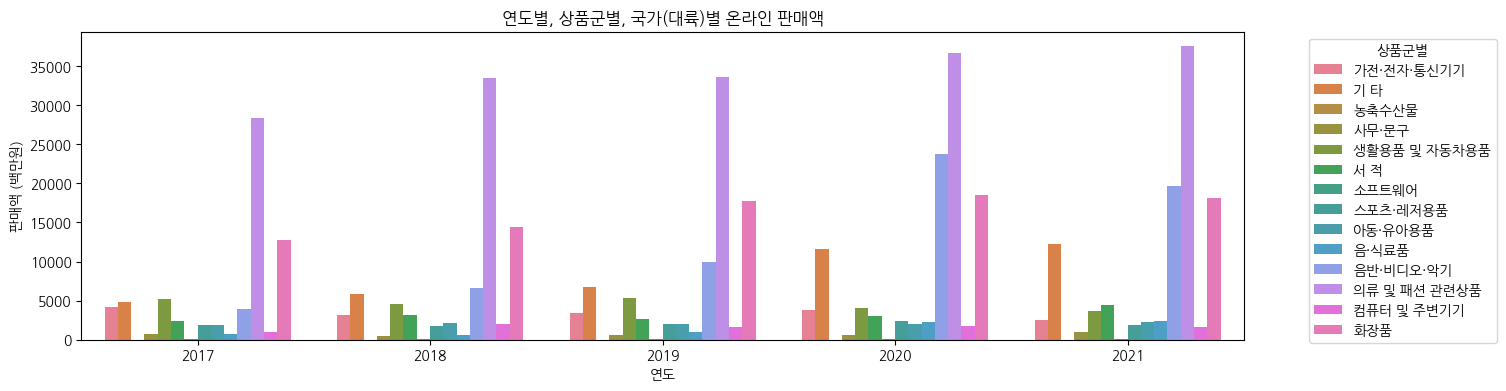

In [27]:
plt.figure(figsize=(15,4))
sns.barplot(x="연도", y="백만원", hue="상품군별", data=df_2021, errorbar=None)
plt.title('연도별, 상품군별, 국가(대륙)별 온라인 판매액')
plt.xlabel('연도')
plt.ylabel('판매액 (백만원)')

# 범례를 플롯 밖으로 이동
plt.legend(title='상품군별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

In [47]:
df = pd.read_csv('전공별_연구원.csv')

In [48]:
df.head(10)

,연구수행주체별(1),전공별(1),2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,연구수행주체별(1),전공별(1),박사,석사,학사,박사,석사,학사,박사,석사,학사,박사,석사,학사
1,연구수행주체별(1),전공별(1),총계,총계,총계,총계,총계,총계,총계,총계,총계,총계,총계,총계
2,공공연구기관,이학,4894,2247,646,4977,2211,778,5226,2518,900,5204,2296,845
3,공공연구기관,공학,10201,8020,2170,10555,8243,2642,10675,7997,2691,11395,8038,2766
4,공공연구기관,의∙약∙보건학,960,740,521,945,683,435,1239,980,653,1453,982,748
5,공공연구기관,농업과학,1608,846,329,1529,764,286,1544,854,401,1499,873,378
6,공공연구기관,인문학,156,346,317,141,335,321,156,310,306,192,367,301
7,공공연구기관,사회과학,2732,2422,601,2720,2430,675,2728,2335,626,2721,2236,721
8,대학,이학,8540,6219,1771,8807,6320,1575,8699,5866,1486,9168,6289,1212
9,대학,공학,19330,16375,3320,20281,17551,3194,20728,17754,2933,21958,17398,2330


In [49]:
df.columns

Index(['연구수행주체별(1)', '전공별(1)', '2019', '2019.1', '2019.2', '2020', '2020.1',
       '2020.2', '2021', '2021.1', '2021.2', '2022', '2022.1', '2022.2'],
      dtype='object')

In [50]:
df = df.drop(df.index[1])

In [52]:
df = df.rename(columns={'연구수행주체별(1)': '연구수행주체'})

In [53]:
df.head()

,연구수행주체,전공별(1),2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,연구수행주체별(1),전공별(1),박사,석사,학사,박사,석사,학사,박사,석사,학사,박사,석사,학사
2,공공연구기관,이학,4894,2247,646,4977,2211,778,5226,2518,900,5204,2296,845
3,공공연구기관,공학,10201,8020,2170,10555,8243,2642,10675,7997,2691,11395,8038,2766
4,공공연구기관,의∙약∙보건학,960,740,521,945,683,435,1239,980,653,1453,982,748
5,공공연구기관,농업과학,1608,846,329,1529,764,286,1544,854,401,1499,873,378


In [54]:
df = df.rename(columns={"전공별(1)" : "전공별"})
df.head()

,연구수행주체,전공별,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,연구수행주체별(1),전공별(1),박사,석사,학사,박사,석사,학사,박사,석사,학사,박사,석사,학사
2,공공연구기관,이학,4894,2247,646,4977,2211,778,5226,2518,900,5204,2296,845
3,공공연구기관,공학,10201,8020,2170,10555,8243,2642,10675,7997,2691,11395,8038,2766
4,공공연구기관,의∙약∙보건학,960,740,521,945,683,435,1239,980,653,1453,982,748
5,공공연구기관,농업과학,1608,846,329,1529,764,286,1544,854,401,1499,873,378


In [55]:
df.columns = list(df.columns[:2]) + [col.split('.')[0] for col in df.columns[2:]]
df.columns

Index(['연구수행주체', '전공별', '2019', '2019', '2019', '2020', '2020', '2020', '2021',
       '2021', '2021', '2022', '2022', '2022'],
      dtype='object')

In [56]:
df.head()

,연구수행주체,전공별,2019,2019,2019,2020,2020,2020,2021,2021,2021,2022,2022,2022
0,연구수행주체별(1),전공별(1),박사,석사,학사,박사,석사,학사,박사,석사,학사,박사,석사,학사
2,공공연구기관,이학,4894,2247,646,4977,2211,778,5226,2518,900,5204,2296,845
3,공공연구기관,공학,10201,8020,2170,10555,8243,2642,10675,7997,2691,11395,8038,2766
4,공공연구기관,의∙약∙보건학,960,740,521,945,683,435,1239,980,653,1453,982,748
5,공공연구기관,농업과학,1608,846,329,1529,764,286,1544,854,401,1499,873,378


In [58]:
df.tail(10)

,연구수행주체,전공별,2019,2019,2019,2020,2020,2020,2021,2021,2021,2022,2022,2022
10,대학,의∙약∙보건학,13966,6781,2767,14876,6975,2423,15379,6427,2829,15204,6888,3111
11,대학,농업과학,2811,1457,222,2798,1446,195,2636,1716,181,2576,1844,94
12,대학,인문학,8215,2526,373,8235,2734,382,7887,2644,276,7984,2430,253
13,대학,사회과학,10978,3658,577,11117,3971,1332,11202,3657,822,10461,3794,906
14,기업체,이학,6152,18797,33407,6416,17855,27962,7656,19912,31977,8481,21590,34293
15,기업체,공학,19328,72020,177666,21302,75099,190177,22827,78854,200133,23320,80067,205502
16,기업체,의∙약∙보건학,920,2392,1864,1016,2677,2067,1175,2962,2578,1328,3146,2792
17,기업체,농업과학,509,1234,1763,489,1199,1854,501,1288,1922,545,1348,1946
18,기업체,인문학,269,1531,13071,242,1647,13992,372,1873,16092,349,1761,16662
19,기업체,사회과학,386,1918,5882,338,1738,5974,385,2026,7094,452,2101,7809


In [63]:
columns_mapping = {
    0: '박사',
    1: '석사',
    2: '학사'
}

# 새로운 열 이름 생성
new_columns = ['연구수행주체', '전공별']
for year in ['2019', '2020', '2021', '2022']:
    for i in range(3):
        new_columns.append(f"{year}_{columns_mapping[i]}")

# 기존 열 이름을 새로운 이름으로 변경
df.columns = new_columns

# 열 이름 변경 후 확인
print("Updated Columns:", df.columns)


Updated Columns: Index(['연구수행주체', '전공별', '2019_박사', '2019_석사', '2019_학사', '2020_박사', '2020_석사',
       '2020_학사', '2021_박사', '2021_석사', '2021_학사', '2022_박사', '2022_석사',
       '2022_학사'],
      dtype='object')


In [65]:
df.head()

,연구수행주체,전공별,2019_박사,2019_석사,2019_학사,2020_박사,2020_석사,2020_학사,2021_박사,2021_석사,2021_학사,2022_박사,2022_석사,2022_학사
0,연구수행주체별(1),전공별(1),박사,석사,학사,박사,석사,학사,박사,석사,학사,박사,석사,학사
2,공공연구기관,이학,4894,2247,646,4977,2211,778,5226,2518,900,5204,2296,845
3,공공연구기관,공학,10201,8020,2170,10555,8243,2642,10675,7997,2691,11395,8038,2766
4,공공연구기관,의∙약∙보건학,960,740,521,945,683,435,1239,980,653,1453,982,748
5,공공연구기관,농업과학,1608,846,329,1529,764,286,1544,854,401,1499,873,378


In [70]:
# 열 이름을 박사, 석사, 학사 순서로 정렬
ordered_columns = ['연구수행주체', '전공별']

for degree in ['박사', '석사', '학사']:
    for year in ['2019', '2020', '2021', '2022']:
        ordered_columns.append(f"{year}_{degree}")

# 열 이름을 재배치
df = df[ordered_columns]
df.columns


Index(['연구수행주체', '전공별', '2019_박사', '2020_박사', '2021_박사', '2022_박사', '2019_석사',
       '2020_석사', '2021_석사', '2022_석사', '2019_학사', '2020_학사', '2021_학사',
       '2022_학사'],
      dtype='object')

In [72]:
df = df.drop(df.index[0])

In [73]:
df.head()

,연구수행주체,전공별,2019_박사,2020_박사,2021_박사,2022_박사,2019_석사,2020_석사,2021_석사,2022_석사,2019_학사,2020_학사,2021_학사,2022_학사
2,공공연구기관,이학,4894,4977,5226,5204,2247,2211,2518,2296,646,778,900,845
3,공공연구기관,공학,10201,10555,10675,11395,8020,8243,7997,8038,2170,2642,2691,2766
4,공공연구기관,의∙약∙보건학,960,945,1239,1453,740,683,980,982,521,435,653,748
5,공공연구기관,농업과학,1608,1529,1544,1499,846,764,854,873,329,286,401,378
6,공공연구기관,인문학,156,141,156,192,346,335,310,367,317,321,306,301


In [75]:
# 데이터를 long-form으로 변환
df_melted = pd.melt(df, id_vars=['연구수행주체', '전공별'], 
                    value_vars=['2019_박사', '2020_박사', '2021_박사', '2022_박사',
                                '2019_석사', '2020_석사', '2021_석사', '2022_석사',
                                '2019_학사', '2020_학사', '2021_학사', '2022_학사'],
                    var_name='연도_학위', value_name='연구원수')

In [76]:
df_melted.head()

,연구수행주체,전공별,연도_학위,연구원수
0,공공연구기관,이학,2019_박사,4894
1,공공연구기관,공학,2019_박사,10201
2,공공연구기관,의∙약∙보건학,2019_박사,960
3,공공연구기관,농업과학,2019_박사,1608
4,공공연구기관,인문학,2019_박사,156


In [77]:
# 연도와 학위를 분리
df_melted[['연도', '학위']] = df_melted['연도_학위'].str.split('_', expand=True)

In [78]:
df_melted

,연구수행주체,전공별,연도_학위,연구원수,연도,학위
0,공공연구기관,이학,2019_박사,4894,2019,박사
1,공공연구기관,공학,2019_박사,10201,2019,박사
2,공공연구기관,의∙약∙보건학,2019_박사,960,2019,박사
3,공공연구기관,농업과학,2019_박사,1608,2019,박사
4,공공연구기관,인문학,2019_박사,156,2019,박사
...,...,...,...,...,...,...
211,기업체,공학,2022_학사,205502,2022,학사
212,기업체,의∙약∙보건학,2022_학사,2792,2022,학사
213,기업체,농업과학,2022_학사,1946,2022,학사
214,기업체,인문학,2022_학사,16662,2022,학사


In [89]:
df1 = df_melted[df_melted['연구수행주체'] == '공공연구기관']
df2 = df_melted[df_melted['연구수행주체'] == '대학']
df3 = df_melted[df_melted['연구수행주체'] == '기업체']

In [90]:
df1 = df1.drop(columns=["연구수행주체"])
df2 = df2.drop(columns=["연구수행주체"])
df3 = df3.drop(columns=["연구수행주체"])

In [91]:
df1.head()

,전공별,연도_학위,연구원수,연도,학위
0,이학,2019_박사,4894,2019,박사
1,공학,2019_박사,10201,2019,박사
2,의∙약∙보건학,2019_박사,960,2019,박사
3,농업과학,2019_박사,1608,2019,박사
4,인문학,2019_박사,156,2019,박사


In [104]:
df1 = df1.sort_values(by=["연구원수"])
df2 = df2.sort_values(by=["연구원수"])
df3 = df3.sort_values(by=["연구원수"])

In [105]:
df1

,전공별,연도_학위,연구원수,연도,학위
1,공학,2019_박사,10201,2019,박사
19,공학,2020_박사,10555,2020,박사
37,공학,2021_박사,10675,2021,박사
55,공학,2022_박사,11395,2022,박사
38,의∙약∙보건학,2021_박사,1239,2021,박사
...,...,...,...,...,...
180,이학,2021_학사,900,2021,학사
20,의∙약∙보건학,2020_박사,945,2020,박사
2,의∙약∙보건학,2019_박사,960,2019,박사
110,의∙약∙보건학,2021_석사,980,2021,석사


Text(0, 0.5, '연구원 수')

c:\Users\dasap\anaconda3\envs\tf10\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Users\dasap\anaconda3\envs\tf10\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


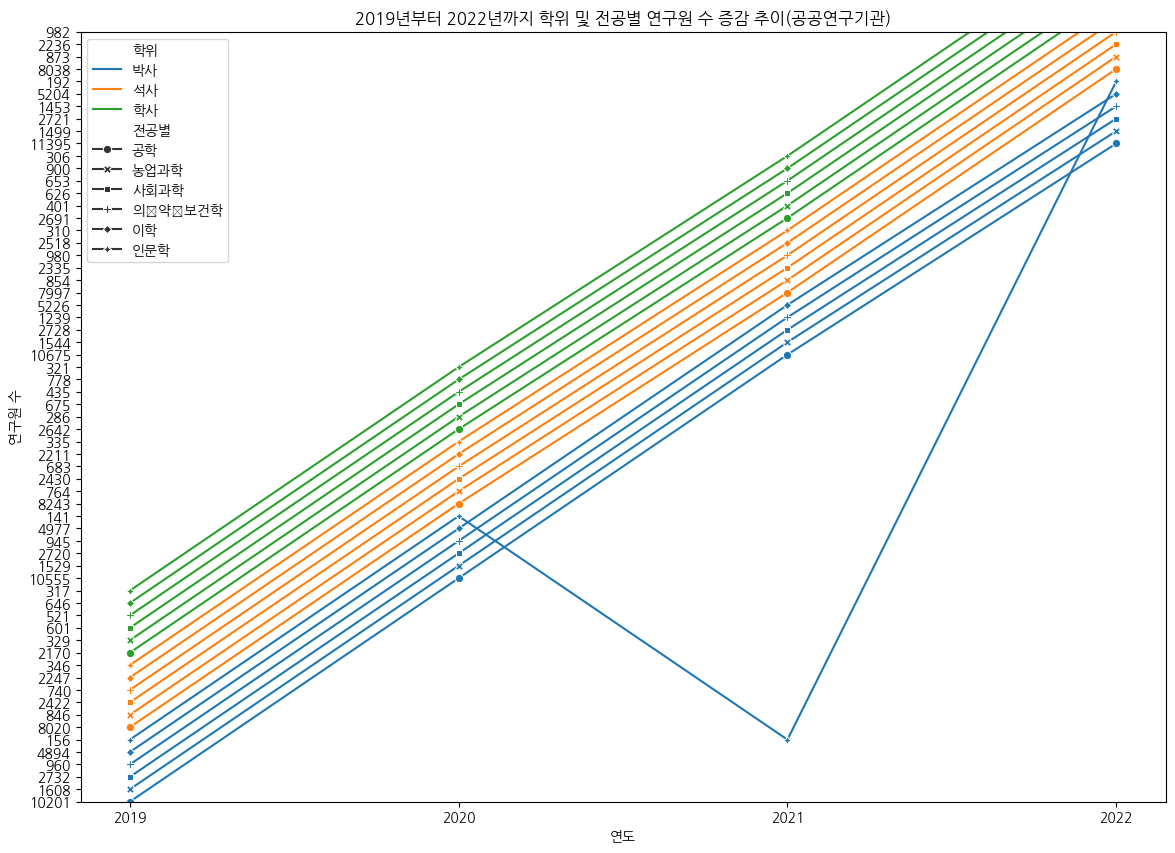

In [110]:
# 연구원수를 기준으로 정렬
df1 = df1.sort_values(by=['연도', '학위', '전공별', '연구원수'], ascending=[True, True, True, True])

# 연구원수의 최소값과 최대값 계산
min_y = df1['연구원수'].min()
max_y = df1['연구원수'].max()

# 그래프 그리기
plt.figure(figsize=(14, 10))
sns.lineplot(data=df1, x='연도', y='연구원수', hue='학위', style='전공별', markers=True, dashes=False)
# y축 범위 설정
plt.ylim(0, max_y)

plt.title('2019년부터 2022년까지 학위 및 전공별 연구원 수 증감 추이(공공연구기관)')
plt.xlabel('연도')
plt.ylabel('연구원 수')
